# Machine Learning Model: Support Vector Machine

In [1]:
from __future__ import division

import os
import scipy as sp
import scipy.io
from scipy.optimize import minimize
import re
import nltk
from nltk import word_tokenize
from stemming.porter2 import stem
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

# 1 Support Vector Machines

In [2]:
dataset_1 = scipy.io.loadmat('data/dataset1.mat')
dataset_2 = scipy.io.loadmat('data/dataset2.mat')
dataset_3 = scipy.io.loadmat('data/dataset3.mat')

In [3]:
from sklearn.svm import SVC # based on libsvm; see http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

## 1.1 Example dataset 1

In [4]:
X_1 = dataset_1['X']
y_1 = dataset_1['y'].reshape(-1)

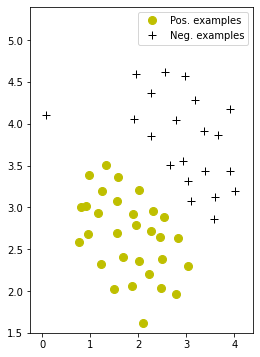

In [5]:
plt.figure(figsize=(4, 6))
plt.plot(X_1[y_1 == 0].T[0], X_1[y_1 == 0].T[1], 'yo', ms=8, label='Pos. examples')
plt.plot(X_1[y_1 == 1].T[0], X_1[y_1 == 1].T[1], 'k+', ms=8, label='Neg. examples')
plt.xlim(-0.25, 4.4)
plt.ylim(1.5, 5.4)
plt.legend(numpoints = 1, loc = 1)
plt.savefig('plots/fig1.jpg')
plt.show()

In [6]:
clf = SVC(C=1, kernel='linear')
clf.fit(X_1, y_1) 

SVC(C=1, kernel='linear')

In [7]:
xs = sp.linspace(-1, 8)

# Calculate the decision boundary
b = clf.intercept_[0]
w_0 = clf.coef_[0, 0]
w_1 = clf.coef_[0, 1]
a = - w_0 / w_1
db_1 = a * xs - b / w_1

# Store support vectors
svs = clf.support_vectors_

# Calculate margins
c = svs[0]
margin_low = a * (xs - c[0]) + c[1] # line of slope "a" passing through point "(c[0], c[1])"
c = svs[-2]
margin_high = a * (xs - c[0]) + c[1]

<ipython-input-7-a98f7db4a095>:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  xs = sp.linspace(-1, 8)


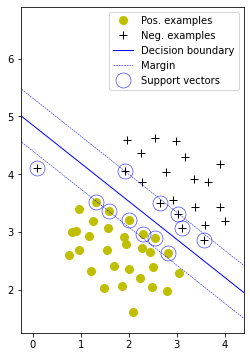

In [8]:
plt.figure(figsize=(4,6))
plt.plot(X_1[y_1 == 0].T[0], X_1[y_1 == 0].T[1], 'yo', ms=8, label='Pos. examples')
plt.plot(X_1[y_1 == 1].T[0], X_1[y_1 == 1].T[1], 'k+', ms=8, label='Neg. examples')
plt.plot(xs, db_1, 'b-', lw=1, label='Decision boundary')
plt.plot(xs, margin_low, 'b--', lw=0.5, label='Margin')
plt.plot(xs, margin_high, 'b--', lw=0.5)
plt.plot(svs.T[0], svs.T[1], marker='o', ls='none', ms=15, mfc='none', mec='b', mew=0.5, label='Support vectors')
plt.xlim(-0.25, 4.4)
plt.ylim(1.25, 6.9)
plt.legend(numpoints = 1, loc = 1)
plt.savefig('plots/fig2.jpg')
plt.show()

In [9]:
clf = SVC(C=100, kernel='linear')
clf.fit(X_1, y_1) 

SVC(C=100, kernel='linear')

In [10]:
xs = sp.linspace(-1, 8)

# Calculate the decision boundary
b = clf.intercept_[0]
w_0 = clf.coef_[0, 0]
w_1 = clf.coef_[0, 1]
a = - w_0 / w_1
db_1 = a * xs - b / w_1

# Store support vectors
svs = clf.support_vectors_

# Calculate margins
c = svs[0]
margin_low = a * (xs - c[0]) + c[1] # line of slope "a" passing through point "(c[0], c[1])"
c = svs[-2]
margin_high = a * (xs - c[0]) + c[1]

<ipython-input-10-a98f7db4a095>:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  xs = sp.linspace(-1, 8)


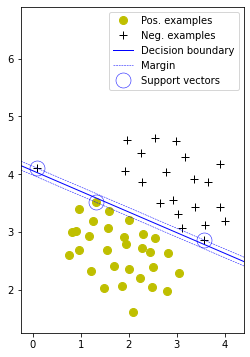

In [11]:
plt.figure(figsize=(4,6))
plt.plot(X_1[y_1 == 0].T[0], X_1[y_1 == 0].T[1], 'yo', ms=8, label='Pos. examples')
plt.plot(X_1[y_1 == 1].T[0], X_1[y_1 == 1].T[1], 'k+', ms=8, label='Neg. examples')
plt.plot(xs, db_1, 'b-', lw=1, label='Decision boundary')
plt.plot(xs, margin_low, 'b--', lw=0.5, label='Margin')
plt.plot(xs, margin_high, 'b--', lw=0.5)
plt.plot(svs.T[0], svs.T[1], marker='o', ls='none', ms=15, mfc='none', mec='b', mew=0.5, label='Support vectors')
plt.xlim(-0.25, 4.4)
plt.ylim(1.25, 6.9)
plt.legend(numpoints = 1, loc = 1)
plt.savefig('plots/fig3.jpg')
plt.show()

## 1.2 SVM with Gaussian kernels

### 1.2.2 Example dataset 2

In [12]:
X_2 = dataset_2['X']
y_2 = dataset_2['y'].reshape(-1)

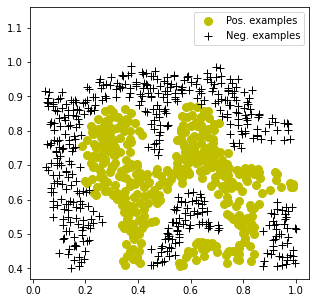

In [13]:
plt.figure(figsize=(5, 5))
plt.plot(X_2[y_2 == 0].T[0], X_2[y_2 == 0].T[1], 'yo', ms=8, label='Pos. examples')
plt.plot(X_2[y_2 == 1].T[0], X_2[y_2 == 1].T[1], 'k+', ms=8, label='Neg. examples')
plt.xlim(-0.01, 1.05)
plt.ylim(0.37, 1.16)
plt.legend(numpoints = 1, loc = 1)
plt.savefig('plots/fig4.jpg')
plt.show()

In [14]:
sigma = 0.1
gamma = 1 / 2 / sigma**2
clf = SVC(C=1, gamma=gamma, kernel='rbf')
clf.fit(X_2, y_2) 

SVC(C=1, gamma=49.99999999999999)

In [15]:
x_0_pts, x_1_pts = sp.linspace(0, 1, 500), sp.linspace(0, 1, 500)
x_0_pts_mesh, x_1_pts_mesh = sp.meshgrid(x_0_pts, x_1_pts)
z = clf.predict(sp.vstack((x_0_pts_mesh.ravel(), x_1_pts_mesh.ravel())).T).reshape(x_0_pts_mesh.shape)

<ipython-input-15-9a8c255f17da>:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  x_0_pts, x_1_pts = sp.linspace(0, 1, 500), sp.linspace(0, 1, 500)
<ipython-input-15-9a8c255f17da>:2: DeprecationWarning: scipy.meshgrid is deprecated and will be removed in SciPy 2.0.0, use numpy.meshgrid instead
  x_0_pts_mesh, x_1_pts_mesh = sp.meshgrid(x_0_pts, x_1_pts)
<ipython-input-15-9a8c255f17da>:3: DeprecationWarning: scipy.vstack is deprecated and will be removed in SciPy 2.0.0, use numpy.vstack instead
  z = clf.predict(sp.vstack((x_0_pts_mesh.ravel(), x_1_pts_mesh.ravel())).T).reshape(x_0_pts_mesh.shape)


<ipython-input-16-06254cf832d9>:4: UserWarning: No contour levels were found within the data range.
  plt.contour(x_0_pts, x_1_pts, z, [0])


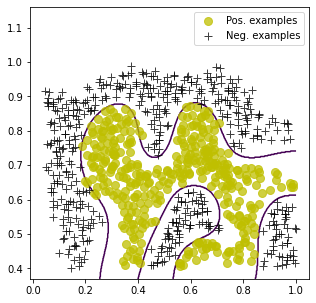

In [16]:
plt.figure(figsize=(5, 5))
plt.plot(X_2[y_2 == 0].T[0], X_2[y_2 == 0].T[1], 'yo', ms=8, alpha=0.75, label='Pos. examples')
plt.plot(X_2[y_2 == 1].T[0], X_2[y_2 == 1].T[1], 'k+', ms=8, alpha=0.75, label='Neg. examples')
plt.contour(x_0_pts, x_1_pts, z, [0])
plt.xlim(-0.01, 1.05)
plt.ylim(0.37, 1.16)
plt.legend(numpoints = 1, loc = 1)
plt.savefig('plots/fig5.jpg')
plt.show()

### 1.2.3 Example dataset 3

In [17]:
X_3 = dataset_3['X']
y_3 = dataset_3['y'].reshape(-1)

X_val_3 = dataset_3['Xval']
y_val_3 = dataset_3['yval']

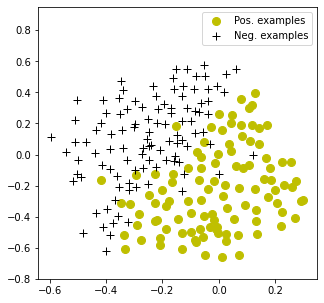

In [18]:
plt.figure(figsize=(5, 5))
plt.plot(X_3[y_3 == 0].T[0], X_3[y_3 == 0].T[1], 'yo', ms=8, label='Pos. examples')
plt.plot(X_3[y_3 == 1].T[0], X_3[y_3 == 1].T[1], 'k+', ms=8, label='Neg. examples')
plt.xlim(-0.64, 0.35)
plt.ylim(-0.8, 0.95)
plt.legend(numpoints = 1, loc = 1)
plt.savefig('plots/fig6.jpg')
plt.show()

In [19]:
vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
C_pts_mesh, sigma_pts_mesh = sp.meshgrid(vals, vals)
scores = sp.vstack((C_pts_mesh.ravel(), sigma_pts_mesh.ravel(), sp.zeros(len(vals)**2))).T
for i, (C, sigma) in enumerate(scores[:, :2]):
    gamma = 1 / 2 / sigma**2
    clf = SVC(C=C, gamma=gamma, kernel='rbf')
    clf.fit(X_3, y_3)
    scores[i, 2] = clf.score(X_val_3, y_val_3)

<ipython-input-19-10f1b44416df>:2: DeprecationWarning: scipy.meshgrid is deprecated and will be removed in SciPy 2.0.0, use numpy.meshgrid instead
  C_pts_mesh, sigma_pts_mesh = sp.meshgrid(vals, vals)
<ipython-input-19-10f1b44416df>:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  scores = sp.vstack((C_pts_mesh.ravel(), sigma_pts_mesh.ravel(), sp.zeros(len(vals)**2))).T
<ipython-input-19-10f1b44416df>:3: DeprecationWarning: scipy.vstack is deprecated and will be removed in SciPy 2.0.0, use numpy.vstack instead
  scores = sp.vstack((C_pts_mesh.ravel(), sigma_pts_mesh.ravel(), sp.zeros(len(vals)**2))).T


In [20]:
highest_acc_index = scores[:, 2].argmax()
C, sigma = scores[highest_acc_index][:2]
gamma = 1 / 2 / sigma**2
clf = SVC(C=C, gamma=gamma, kernel='rbf')
clf.fit(X_3, y_3)

SVC(gamma=49.99999999999999)

In [21]:
x_0_pts, x_1_pts = sp.linspace(-0.64, 0.35, 500), sp.linspace(-0.8, 0.65, 500)
x_0_pts_mesh, x_1_pts_mesh = sp.meshgrid(x_0_pts, x_1_pts)
z = clf.predict(sp.vstack((x_0_pts_mesh.ravel(), x_1_pts_mesh.ravel())).T).reshape(x_0_pts_mesh.shape)

<ipython-input-21-9f3f1fa0834d>:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  x_0_pts, x_1_pts = sp.linspace(-0.64, 0.35, 500), sp.linspace(-0.8, 0.65, 500)
<ipython-input-21-9f3f1fa0834d>:2: DeprecationWarning: scipy.meshgrid is deprecated and will be removed in SciPy 2.0.0, use numpy.meshgrid instead
  x_0_pts_mesh, x_1_pts_mesh = sp.meshgrid(x_0_pts, x_1_pts)
<ipython-input-21-9f3f1fa0834d>:3: DeprecationWarning: scipy.vstack is deprecated and will be removed in SciPy 2.0.0, use numpy.vstack instead
  z = clf.predict(sp.vstack((x_0_pts_mesh.ravel(), x_1_pts_mesh.ravel())).T).reshape(x_0_pts_mesh.shape)


<ipython-input-22-d1a18790f56c>:4: UserWarning: No contour levels were found within the data range.
  plt.contour(x_0_pts, x_1_pts, z, [0])


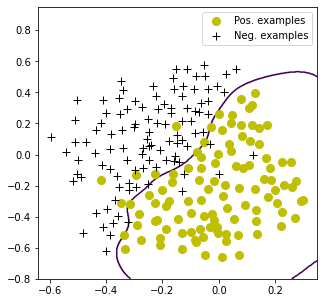

In [22]:
plt.figure(figsize=(5, 5))
plt.plot(X_3[y_3 == 0].T[0], X_3[y_3 == 0].T[1], 'yo', ms=8, label='Pos. examples')
plt.plot(X_3[y_3 == 1].T[0], X_3[y_3 == 1].T[1], 'k+', ms=8, label='Neg. examples')
plt.contour(x_0_pts, x_1_pts, z, [0])
plt.xlim(-0.64, 0.35)
plt.ylim(-0.8, 0.95)
plt.legend(numpoints = 1, loc = 1)
plt.savefig('plots/fig7.jpg')
plt.show()

# 2 Spam classification

In [23]:
vocab_list = sp.loadtxt('data/vocab.txt', dtype='str')
vocab_index_dict = {row[1]: int(row[0]) for row in vocab_list}
index_vocab_dict = {int(row[0]): row[1] for row in vocab_list}

<ipython-input-23-316d9518cec1>:1: DeprecationWarning: scipy.loadtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.loadtxt instead
  vocab_list = sp.loadtxt('data/vocab.txt', dtype='str')


## 2.1 Preprocessing emails

In [24]:
spam_train = scipy.io.loadmat('data/spamTrain.mat')
spam_test = scipy.io.loadmat('data/spamTest.mat')

In [25]:
with open('data/emailSample1.txt', 'r') as f:
    email_contents_1 = f.read()

In [26]:
print(email_contents_1)

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com




### 2.1.1 Vocabulary list

In [27]:
stemmer = nltk.PorterStemmer()

In [28]:
def process_email(email_contents, verbose=True):
    
    word_indices = []
    
    # Add code to strip headers here?
    
    email_contents = email_contents.lower()
    
    # Strip all HTML
    email_contents = re.sub(r'<[^<>]+>', ' ', email_contents)
    
    # Handle Numbers
    email_contents = re.sub(r'[0-9]+', 'number', email_contents)
    
    # Handle URLS
    email_contents = re.sub(r'(http|https)://[^\s]*', 'httpaddr', email_contents)
    
    # Handle Email Addresses
    email_contents = re.sub(r'[^\s]+@[^\s]+', 'emailaddr', email_contents)
    
    # Handle $ sign
    email_contents = re.sub(r'[$]+', 'dollar', email_contents)
    
    # Handle punctuation and special ascii characters
    email_contents = re.sub(r'[@$/\\#,-:&*+=\[\]?!(){}\'\">_<;%]+', '', 
                            email_contents)    
    
    # Tokenize
    word_list = word_tokenize(email_contents)

    for i, word in enumerate(word_list):
        # Remove punctuation and non-alphanumeric characters.
        word = re.sub(r'[^a-zA-Z0-9]', '', word)
        
        # If remaining word length is zero, continue.
        if len(word) < 1:
            continue
            
        # Stem 
        try:
            word = stemmer.stem(word)
        except:
            continue
            
        if verbose == True:           
            print(word)
            if (i+1) % 13 == 0: print('\r')
            
        try:
            word_indices.append(vocab_dict[word])
        except:
            continue

    if verbose == True: print("")
    
    return word_indices  

In [29]:
word_indices_1 = process_email(email_contents_1)

anyon
know
how
much
it
cost
to
host
a
web
portal
well
it

depend
on
how
mani
visitor
your
expect
thi
can
be
anywher
from
less

than
number
buck
a
month
to
a
coupl
of
dollarnumb
you
should
checkout

httpaddr
or
perhap
amazon
ecnumb
if
your
run
someth
big
to
unsubscrib
yourself

from
thi
mail
list
send
an
email
to
emailaddr



In [30]:
for i in [1, 2, 3, 86, 916, 1898, 1899]:
    print(i, index_vocab_dict[i])
    if i in [3, 86, 916]:
        print('...')

1 aa
2 ab
3 abil
...
86 anyon
...
916 know
...
1898 zero
1899 zip


In [31]:
for i, index in enumerate(word_indices_1):
    print(index)
    if (i+1) % 5 == 0: print('\r')

## 2.2 Extracting features from emails

In [32]:
def email_features(word_indices):
    features = sp.zeros(len(index_vocab_dict.keys()))
    for index in word_indices:
        features[index - 1] = 1
    return features

In [33]:
features_1 = email_features(word_indices_1)

<ipython-input-32-9590df7de7e0>:2: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  features = sp.zeros(len(index_vocab_dict.keys()))


## 2.3 Training SVM for spam classification

In [34]:
spam_train = scipy.io.loadmat('data/spamTrain.mat')
spam_test = scipy.io.loadmat('data/spamTest.mat')

In [35]:
X_train = spam_train['X']
y_train = spam_train['y'].ravel()

X_test = spam_test['Xtest']
y_test = spam_test['ytest'].ravel()

In [36]:
clf = SVC(C=0.1, kernel='linear')
clf.fit(X_train, y_train)
print('training accuracy:', clf.score(X_train, y_train))
print('test accuracy:', clf.score(X_test, y_test))

training accuracy: 0.99825
test accuracy: 0.989


## 2.4 Top predictors for spam

In [37]:
weights = clf.coef_.reshape(-1)
sorted_indices = sp.argsort(weights)[::-1]

<ipython-input-37-3cf1a58ab0ca>:2: DeprecationWarning: scipy.argsort is deprecated and will be removed in SciPy 2.0.0, use numpy.argsort instead
  sorted_indices = sp.argsort(weights)[::-1]


In [38]:
vocab_words = sp.loadtxt('data/vocab.txt', dtype='str').T[1]

<ipython-input-38-4494157218eb>:1: DeprecationWarning: scipy.loadtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.loadtxt instead
  vocab_words = sp.loadtxt('data/vocab.txt', dtype='str').T[1]


In [39]:
print('top predictors of spam:')
for index in sorted_indices[:20]:
    print('%10s  %.2f' % (vocab_words[index], weights[index]))

top predictors of spam:
       our  0.50
     click  0.47
     remov  0.42
  guarante  0.38
     visit  0.37
  basenumb  0.35
    dollar  0.32
      will  0.27
     price  0.27
     pleas  0.26
      most  0.26
      nbsp  0.25
        lo  0.25
        ga  0.25
      hour  0.25
        al  0.24
        da  0.23
        se  0.23
      want  0.23
dollarnumb  0.23


## 2.5 Try your own emails

In [40]:
def email_classifier(file_name):
    with open(file_name, 'r') as f:
        email_contents = f.read()

    word_indices = process_email(email_contents, verbose=False)
    features = email_features(word_indices)
    print("")
    print("CLASSIFICATION: ", "SPAM" if clf.predict(features.reshape(1, -1))[0] else "HAM")

Classify emailSample1.txt. 

In [41]:
print("CLASSIFICATION: ", "SPAM" if clf.predict(features_1.reshape(1, -1))[0] else "HAM")

CLASSIFICATION:  SPAM


Classify emailSample2.txt.

In [42]:
email_classifier('data/emailSample2.txt')


CLASSIFICATION:  SPAM
<ipython-input-32-9590df7de7e0>:2: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  features = sp.zeros(len(index_vocab_dict.keys()))


Classify spamSample1.txt.

In [43]:
email_classifier('data/spamSample1.txt')


CLASSIFICATION:  SPAM
<ipython-input-32-9590df7de7e0>:2: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  features = sp.zeros(len(index_vocab_dict.keys()))


Classify spamSample2.txt.

In [44]:
email_classifier('data/spamSample2.txt')


CLASSIFICATION:  SPAM
<ipython-input-32-9590df7de7e0>:2: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  features = sp.zeros(len(index_vocab_dict.keys()))


In [45]:
weights = clf.coef_.reshape(-1)
sorted_indices = sp.argsort(weights)[::-1]

<ipython-input-45-3cf1a58ab0ca>:2: DeprecationWarning: scipy.argsort is deprecated and will be removed in SciPy 2.0.0, use numpy.argsort instead
  sorted_indices = sp.argsort(weights)[::-1]


In [46]:
print('top predictors of spam:')
for index in sorted_indices[:20]:
    print('%10s  %.2f' % (vocab_words[index], weights[index]))

top predictors of spam:
       our  0.50
     click  0.47
     remov  0.42
  guarante  0.38
     visit  0.37
  basenumb  0.35
    dollar  0.32
      will  0.27
     price  0.27
     pleas  0.26
      most  0.26
      nbsp  0.25
        lo  0.25
        ga  0.25
      hour  0.25
        al  0.24
        da  0.23
        se  0.23
      want  0.23
dollarnumb  0.23


Classify emailSample1.txt. 

In [47]:
print("CLASSIFICATION: ", "SPAM" if clf.predict(features_1.reshape(1, -1))[0] else "HAM")

CLASSIFICATION:  SPAM


Classify emailSample2.txt.

In [48]:
email_classifier('data/emailSample2.txt')


CLASSIFICATION:  SPAM
<ipython-input-32-9590df7de7e0>:2: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  features = sp.zeros(len(index_vocab_dict.keys()))


Classify spamSample1.txt.

In [49]:
email_classifier('data/spamSample1.txt')


CLASSIFICATION:  SPAM
<ipython-input-32-9590df7de7e0>:2: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  features = sp.zeros(len(index_vocab_dict.keys()))


Classify spamSample2.txt.

In [50]:
email_classifier('data/spamSample2.txt')


CLASSIFICATION:  SPAM
<ipython-input-32-9590df7de7e0>:2: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  features = sp.zeros(len(index_vocab_dict.keys()))
